# Week 5: Introduction to Supervised Machine Learning

This week, we will introduce another tool that can be used to analyse data: Machine Learning. By the end of this model, you should be able to:
1. Define Supervised Machine Learning and understand its importance in biology.
2. Explain the typical procedure to train an ML model.
3. Implement a program to create an ML Model using a framework called `sklearn`.
4. Understand appropriate ways to evaluate the performance of an ML Model.


### What is Machine Learning?
First, you have probably heard both the terms machine learning (ML) and artificial intelligence (AI) before and may be wondering what the difference is.


**Artificial Intelligence (AI)** is the field of computer science that focuses on creating systems capable of performing tasks that would typically require human intelligence. These tasks include recognizing patterns, learning from data, making decisions, and solving complex problems.

**Machine Learning (ML)** is a subset of AI. Rather than explicitly programming a computer to follow a fixed set of rules, in ML, we "teach" computers to learn from data. This is particularly useful in fields like biology, where there is an abundance of data, but the patterns and relations in the data are complex and hard for a human to parse through.


![aiml_hierarchy](aiml_hierarchy.png)

AI and ML are becoming essential tools in biology, with applications such as:

* Genomics: Identifying gene sequences associated with specific diseases.
* Drug Discovery: Predicting which compounds may act effectively on certain targets, helping to speed up the drug discovery process.
* Imaging and Diagnostics: Analyzing medical images (like MRI or histology slides) to identify patterns that might indicate disease.
* Ecology and Evolution: Analyzing large-scale environmental data or understanding population dynamics and evolutionary patterns.


Many of you have heard recent developments in ML, and these advancements continue to impact the way we work, learn, and coexist with technology. You may be surprised to find that machine learning is becoming increasingly important in biological research. A study by  [Walsh et al. (2021)](https://https://www.nature.com/articles/s41592-021-01205-4#citeas) shows an exponential increase of ML publications in biology since the 1990's, shown in the figure below.

![ml_in_bio](ml_in_bio.png)

It's clear to see the scientific community is rapidly adopting ML techniques as a means to drive new findings.  Bridging the gap in knowledge between computer scientists/engineers and researchers in the scientific community is very much a work in progress. Our goal is to learn, at a very high level, what machine learning entails and how it may be used in biological research.


### ML Pipeline

A Machine learning pipeline typically involves 4 steps.

1. Data Preparation: In this step, we obtain the relevant data for the task we are trying to perform and clean up records that seem incorrect.
2. Data Exploration: We then analyze the data at hand to manually find potentially interesting patterns.
3. Model Training: Once we have explored our data and manually identified potential trends and patterns, we can train (aka fit) a machine learning model. Ideally, the ML model will pick up patterns we have missed and will be able to outperform rules we discover.
4. Model Evaluation: To confirm if the model picked up useful trends, we will use a variety of metrics to evaluate how well the model does at our task.

In this course, Week 3 covered Steps 1 and 2 (but we will practice step 2 below). We will cover Steps 3 and 4 in the main module.

![mlp](ml_pipeline.png)

### Problem statement: Breast cancer

Hopefully, you enjoyed the heart failure analysis from earlier weeks, because we have yet another task:

You have recently moved to a new research lab within the Canadian Cancer Society, studying breast cancer cells. The Canadian Cancer Society estimates that 1 in 8 women will develop breast cancer, with breast cancer constituting about 14% of cancer deaths among women. However, not all breast cancer cells are malignant. If there is a way to accurately detect if a particular breast cancer cell is benign or malignant early on, medical resources could be better allocated for better patient care. The team would like to find out if machine learning could be used to predict which cancer cells are benign or malignant, knowing that ML methods have been  shown to be feasible in other cancer cell analyses in the industry.

You have been given a public dataset from the Diagnostic Wisconsin Breast Cancer Database*, containing features from digitized images of breast cancer cell nuclei. From these images, the research team took measurements that show various characteristics (eg. radius, symmetry, etc.) for each sample. For each characteristic, they also took several measurements on each image and computed the mean, standard error, and "worst" (mean of the three largest values). These measurements and mean/std error/worst values comprise the features of this dataset. For example, the ```radius_mean``` feature is the mean of distances from the center of the nucleus to various points on the perimeter. ```radius_worst``` is the mean of the 3 longest distances from the nucleus to the center for that image. 

Take a moment to view the dataset **bc_data.csv** (using Excel or another .csv file viewer). 

While you are excited to contribute to your team's research, there are a few gaps in your knowledge, starting with... how does machine learning even work?

*https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Data Preparation
![dp](data_prep_pipeline.png)
While in most real-world cases, you (or your team) may need to go out and collect data, we will use a dataset that has already been prepared for us. Below, we load in the dataset from an online source where `X` is the measurements taken by the researchers, and `y` contains whether or not a positive diagnosis was given. Each row in the data represents one sample.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bc_data.csv', index_col=0)
df = df.drop('Unnamed: 32', axis=1)
df.head()

y = df["diagnosis"] #.map({"B" : 0, "M" : 1})
X = df.drop("diagnosis", axis = 1)


Below we print out the first few rows of both `X` (the measurements taken by the researchers) and `y` (the diagnosis for diabetes)

In [2]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.head()

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
Name: diagnosis, dtype: object

### Data Exploration:

![de](data_explore_pipeline.png)

Before we dive into training an ML Model, we will first manually explore the data to see if we can identify potential reasons for diabetes.

Let's analyze the positive and negative cases for the Breast Cancer dataset. Under the column "diagnosis", there are 2 possible values: M (malignant) and B (benign). 

---
**Q1: Subset `X` into two different dataframes, one with all positive cases and one with negative cases. What percentage of patients have diabetes?**

> Hint: Look at week 3 Question 5 on how to subset dataframes.

<span style="background-color: #FFD700">**Write your code below**</span> 


In [5]:
positive_cases = X[y == 'M'] 
negative_cases = X[y == 'B']
n_positive = positive_cases.shape[0]
n_negative = negative_cases.shape[0]

print(f"{n_positive / (n_positive + n_negative) * 100:.2f}% of the cases are positive")

37.26% of the cases are positive


<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q2: Calculate the mean and standard deviations of the attributes for patients with diabetes as well as the average values for patients without diabetes. What differences do you notice between the two groups?**

<span style="background-color: #FFD700">**Write your code below**</span> 


In [6]:
positive_cases.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [7]:
negative_cases.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q3: Create Histograms of the patient attributes for both the positive and negative groups. What differences do you notice between the two groups?**

<span style="background-color: #FFD700">**Write your code below**</span> 


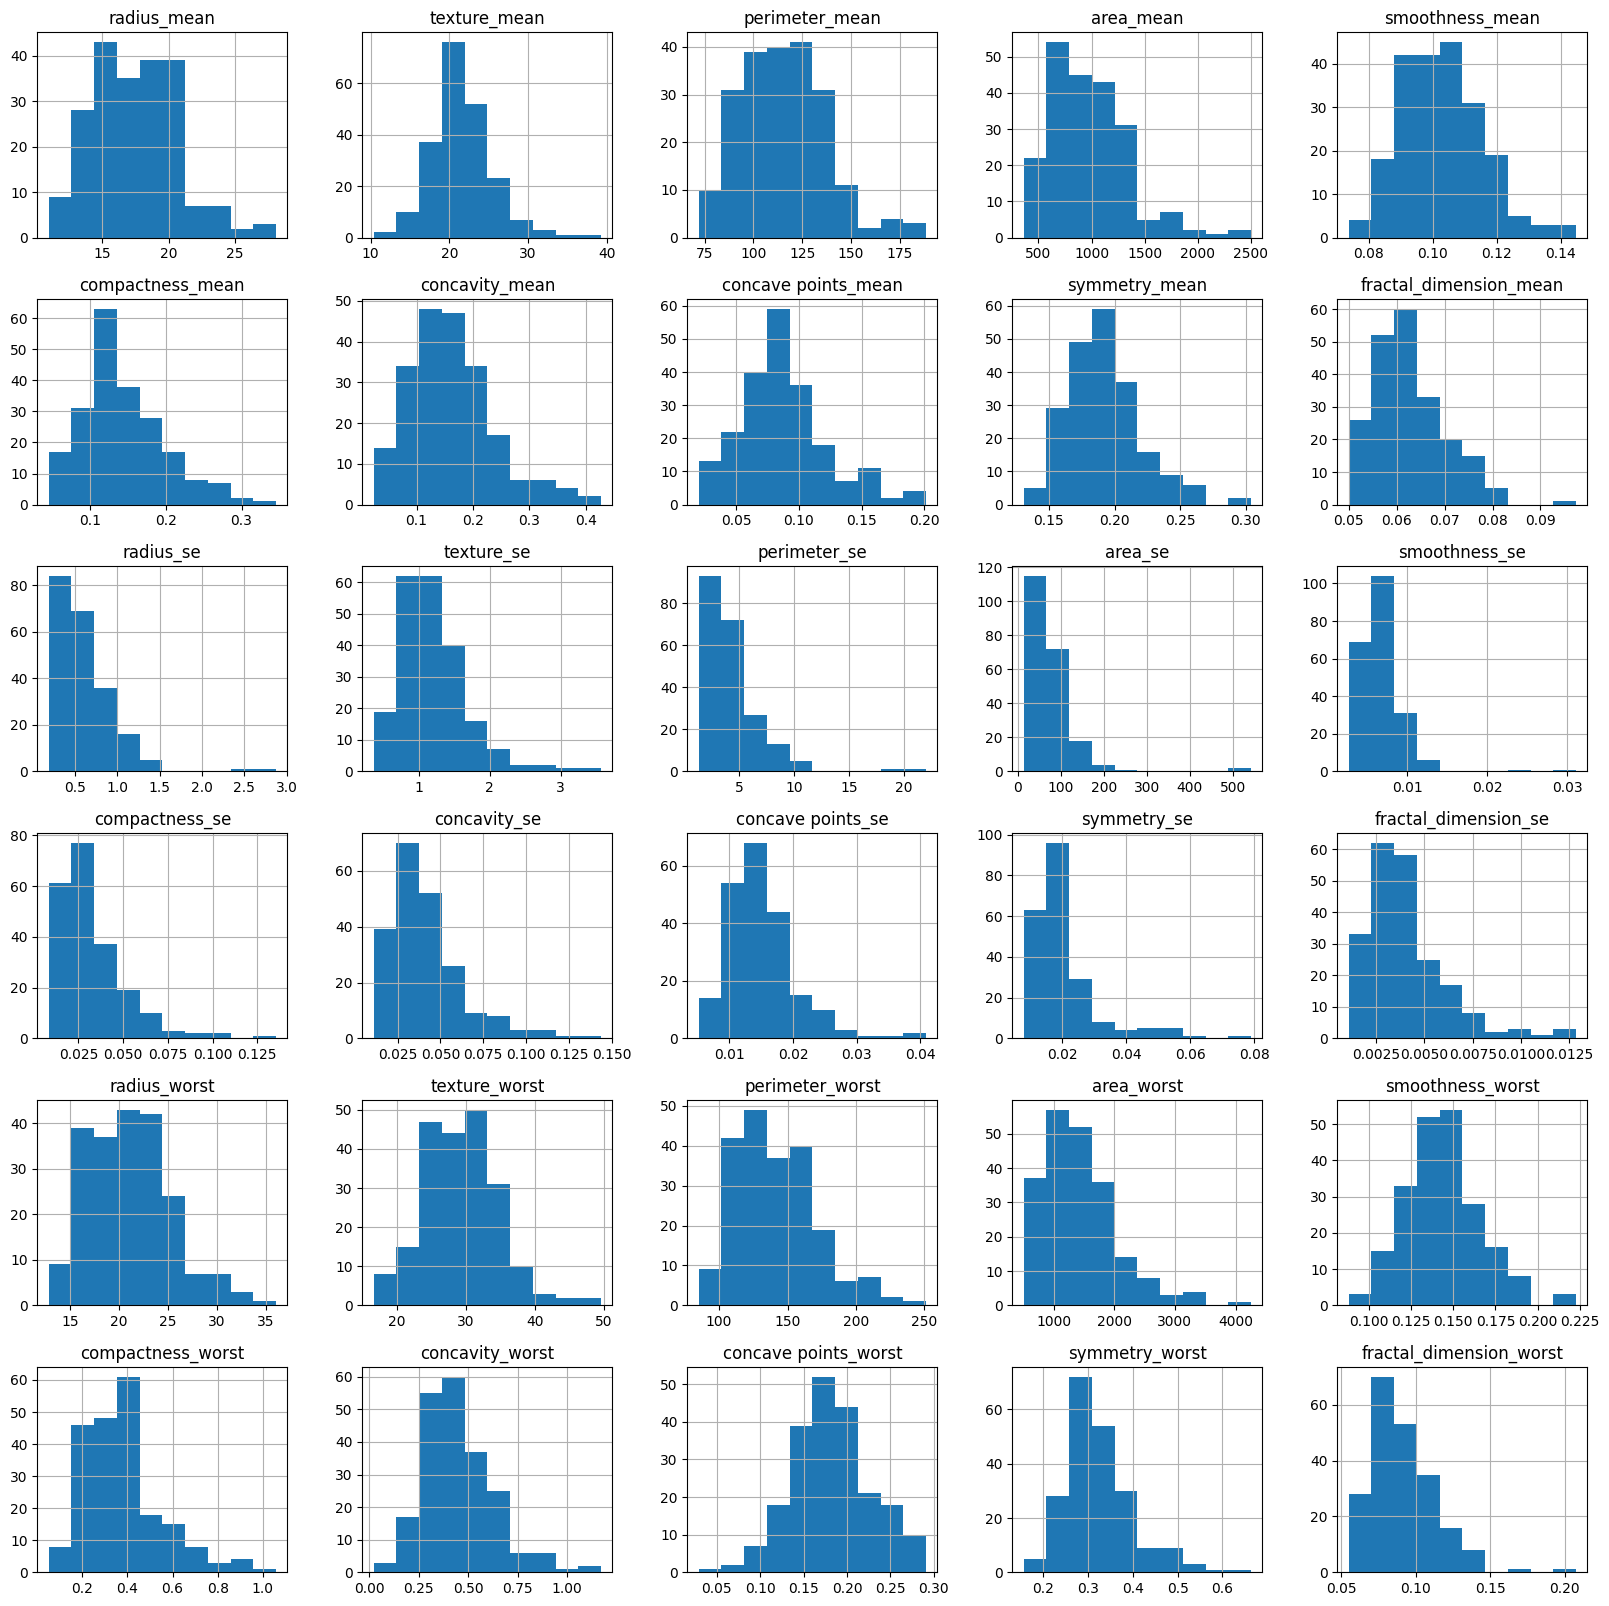

In [8]:
positive_cases.hist(figsize=(20,20))
plt.show()

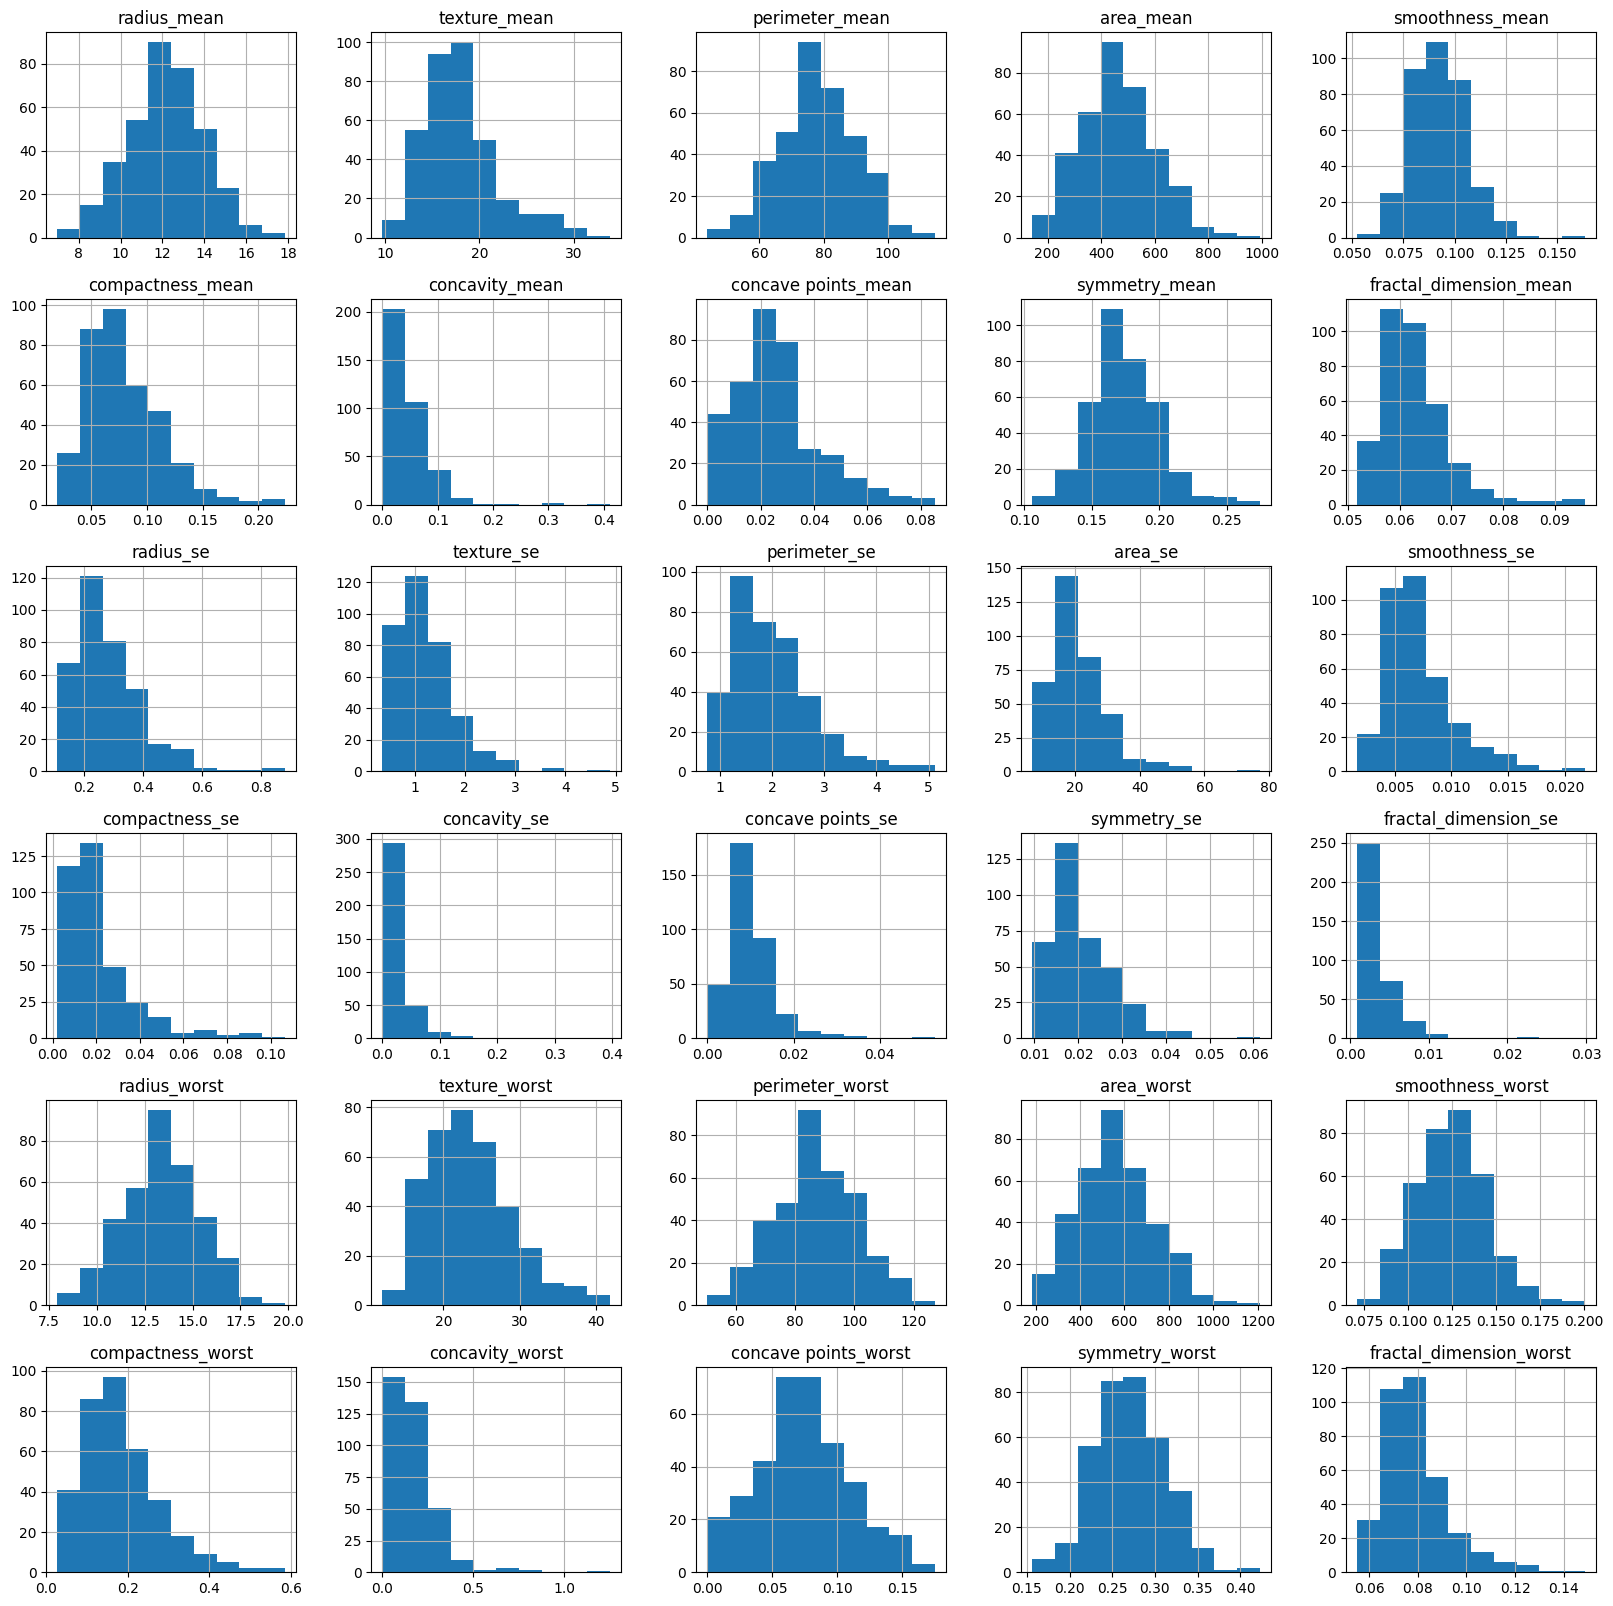

In [9]:
negative_cases.hist(figsize=(20,20))
plt.show()

<span style="background-color: #FFD700">**Write your answer below**</span>

---

## **Graded Question: (3 marks)**

**GQ1. (3 marks) Using the analysis above, do your best to create a few rules (1-2+) that doctors may use to identify patients with breast cancer, then subset `X` and `y` based on these rules (1pt). How many patients with breast cancer did you identify (1pt)? How many did you miss (1pt)?**

> Rule Examples: `Patients have diabetes if Age > 10` or `Patients don't have diabetes if Pregnancies >=2`. These do not do well, please make your own.


In [12]:
# Example rule
example_rule_positive_cases = y[X['area_worst'] > 600]
example_rule_negative_cases = y[X['area_worst'] <= 600]

In [13]:
n_patients_captured = np.sum(example_rule_positive_cases == 'M') 
n_patients_missed = np.sum(example_rule_negative_cases == 'B') 
print(f"Ratio of Patients captured: {n_patients_captured:.2f}, Patients missed: {n_patients_missed:.2f}")

Ratio of Patients captured: 207.00, Patients missed: 223.00


<span style="background-color: #FFD700">**Write your code below**</span> 


<span style="background-color: #FFD700">**Write your answer below**</span>

---